In [17]:
import time
import statistics
import itertools
import operator
import numpy as np
import matplotlib.pyplot as plt
from KDEpy import FFTKDE
from scipy.stats import norm

In [41]:
import KDEpy

In [ ]:
KDEpy.

In [25]:
def time_function(function, n=10, t=25):
    times = []
    for _ in range(t):
        data = np.random.randn(n) * 10
        weights = np.random.randn(n) ** 2
        start_time = time.perf_counter()
        function(data, weights)
        times.append(time.perf_counter() - start_time)
    return statistics.mean(times)

In [26]:
def time_FFT(data, weights):
    x, y = FFTKDE().fit(data, weights)()

In [27]:
# Generate sizes [5, 10, 50, 100, ..., 10_000_000]
data_sizes = list(itertools.accumulate([5, 2] * 7, operator.mul))

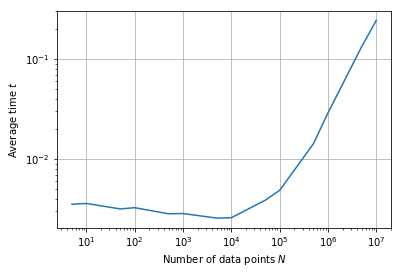

In [28]:
times_fft = [time_function(time_FFT, k) for k in data_sizes]
plt.loglog(data_sizes, times_fft, label='FFTKDE')

plt.xlabel('Number of data points $N$')
plt.ylabel('Average time $t$')
plt.grid(True);

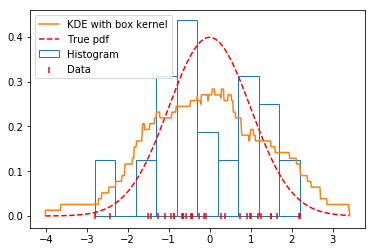

In [31]:
np.random.seed(123)
distribution = norm()  # Create normal distribution
data = distribution.rvs(32)

# Use a box function with the FFTKDE to obtain a density estimate
x, y = FFTKDE(kernel='box', bw=0.7).fit(data).evaluate()

plt.plot(x, y, zorder=10, color='#ff7f0e', label='KDE with box kernel')
plt.scatter(data, np.zeros_like(data), marker='|', c='r',
            label='Data', zorder=9)
plt.hist(data, density=True, label='Histogram', edgecolor='#1f77b4', color='w')
plt.plot(x, distribution.pdf(x), label='True pdf', c='r', ls='--')
plt.legend(loc='best');

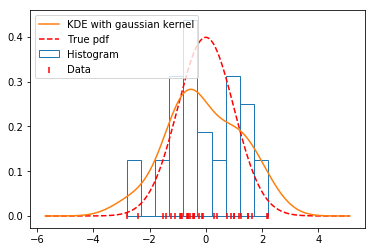

In [38]:
# Use a box function with the FFTKDE to obtain a density estimate
x, y = FFTKDE(kernel='gaussian', bw=0.7).fit(data).evaluate()

plt.plot(x, y, zorder=10, color='#ff7f0e', label='KDE with gaussian kernel')
plt.scatter(data, np.zeros_like(data), marker='|', c='r',
            label='Data', zorder=9)
plt.hist(data, density=True, label='Histogram', edgecolor='#1f77b4', color='w')
plt.plot(x, distribution.pdf(x), label='True pdf', c='r', ls='--')
plt.legend(loc='best');

In [35]:
?FFTKDE